# This notebook is dedicated to store information and code about pytorch's neural networks for classification problems

**types of classification**

* binary classification - this type of problem is focussed on predicting if something is one or another, if it is 0 or 1, yes or not etc. **examples:** predicting a disease, predicting if an email is spam or not etc.

* multiclass classification - any classification with more than two classes falls into this type of problem. **examples:** trying to guess a type of food from image, trying to guess which country someone is from etc.

* multilabel classification - this is the type of problem where the answer has more than one label (each x has more than one y). **examples:** trying to classify the genres of movie, or trying to label the subjects of which a wikipedia article is talking about.

## classification inputs and outputs

the inputs can be all sorts of things as long as it can be represented as numbers (tensors)

for example, for computer vision classification problems an image will be an input, then the pixels and the color associated with them will be represented in a tensor

* the act of transforming raw data into numbers is often refered as **numerical encoding**

the outputs are often probabilities the model guessed of a certain class to be true, this percentages are direcly liked to model's accuracy, with has high accuracy its probabilities will be more certain



## architecture of a classification model

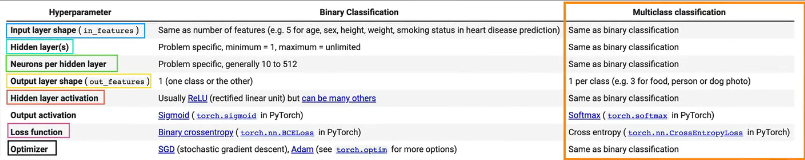

### 1. make data

In [ ]:
import numpy as np
import torch
from sklearn.datasets import make_circles
import pandas as pd

# set um samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

print(f'first 5 samples of X: {X[:5]}')
print(f'first 5 samples of y: {y[:5]}')

first 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples of y: [1 1 1 1 0]


In [ ]:
# we have 1000 samples (dim 0) and 2 features for each y (dim 1)
X.shape

(1000, 2)

In [ ]:
# make a pandas dataframe
circles = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1]})
circles['y'] = y
circles

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


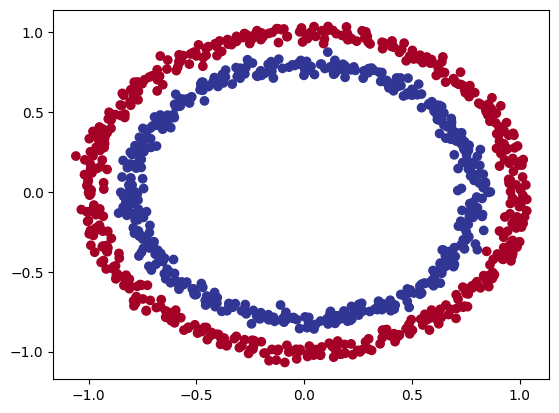

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

#### can we make a model to classify with a given dot as red or blue?

## 1.1 check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

data is currencly in numpy dtype (ndarray), we have to turn it into tensors

In [ ]:
# turn ndarray in tensor

X_tensor = torch.from_numpy(X).type(torch.float)
y_tensor = torch.from_numpy(y).type(torch.float)

print(type(X_tensor), type(y_tensor))

<class 'torch.Tensor'> <class 'torch.Tensor'>


## 1.2 creating train and test splits of data

In [ ]:
X_tensor.shape, y_tensor.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
print(X_tensor[0, 0])

tensor(0.7542)


In [ ]:
## remembering: slicing in python

a = [1, 2, 3, 4, 5, 6]
print(a[:2], a[2:])

[1, 2] [3, 4, 5, 6]


In [ ]:
X_train, X_test = X_tensor[:int(0.8*len(X_tensor)), :], X_tensor[int(0.8*len(X_tensor)):, :]

y_train, y_test = y_tensor[:int(0.8*len(y_tensor))], y_tensor[int(0.8*len(y_tensor)):]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
# or we can split data using sklearn train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

len(x_train), len(y_train), len(x_test), len(y_test)

# this is even better since train_test_split shuffles the data so its randomly distributed

(800, 800, 200, 200)

## 2. setup device agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

## creating the model that:

1. subclasses "nn.Module" (almost all models in pytorch are a subclass of "nn.Module")
2. create 2 "nn.Linear() layers that are capable of handling the shapes of our data
3. defines a "forward()" method that outlines the foward pass (or forward computation) of the model
4. instanciate an instance of our model class and send it to the target "device"

In [ ]:
from torch import nn

# 1. construct a model as a subclass of nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # define a forward() method that outlies the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4. instanciate an instance of our model class and send it to the target device

model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# create the same model using less code:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3189,  0.4770],
                      [ 0.0142, -0.1658],
                      [-0.1953,  0.0573],
                      [ 0.0021, -0.0836],
                      [-0.6909,  0.2978]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.6904, -0.6514,  0.3190,  0.1120,  0.6303], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.4152, -0.3510,  0.3507, -0.1452,  0.1200]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.3894], device='cuda:0'))])

In [ ]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(x_test.to(device))
len(untrained_preds), untrained_preds.shape

(200, torch.Size([200, 1]))

In [ ]:
untrained_preds[:10]

tensor([[-0.0457],
        [ 0.0348],
        [-0.3611],
        [ 0.0441],
        [-0.5270],
        [-0.4767],
        [-0.1186],
        [-0.2388],
        [-0.3536],
        [ 0.0383]], device='cuda:0')

### setup a losso function and optimizer

which loss function or optimizer to pick? (problem specific)

Regression:
* MAE
* MSE

classification:
* binary cross entropy
* categorical cross entropy

reminder **loss function**:
- predictis how wrong our model is
- we're going to use in this example: torch.nn.BCEWithLogitsLoss()

for optimizers:
* SDG
* adam


In [ ]:
# setup loss function
loss_fn = nn.BCEWithLogitsLoss() # already have sigmoid built-in
# nn.BCELoss() - requires inputs to have gone already through the sigmoid function

optimizer = torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)




In [ ]:
# calculate accuracy metric - True positive / (True positive + True negative) * 100

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## build a training loop

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward (backpropagation)
5. optimizer step (gradiente descent)


### going from raw logits -> prediction probabilities -> prediction labels

our model outputs are gonna be raw **logits**

**logits** can be converted into prediction pobabilities by passim them to some kind of activation function (like: sigmoid for binary classification and softmax for multiclass classification)

after that, the probabilities can be converted into **prediction labels** by either rounding them (binary) or passim them through argmax() (multiclass)

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))

In [ ]:
# use the sigmoid on our model logits

y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)

In [ ]:
print(accuracy_fn(y_test.to(device), y_preds))

10000.0


In [ ]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test.numpy(), y_preds.to('cpu').numpy())

0.4

In [ ]:
len(y_test), len(y_preds)

(200, 200)

### buld the training loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the num of epochs
epochs = 10000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### training
  model_0.train()

  # 1. forward pass
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # 2. calculate the loss
  loss = loss_fn(y_logits,
                 y_train)

  train_acc = accuracy_score(y_train.to('cpu').detach().numpy(), y_pred.to('cpu').detach().numpy())

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_score(y_test.to('cpu').detach().numpy(), test_pred.to('cpu').detach().numpy())


  # print out what's happening
  if epoch % 1000 == 0:
    print(f'epoch: {epoch}, train-loss: {loss}, train-acc: {train_acc}, test-loss: {test_loss}, test-acc: {test_acc}')





epoch: 0, train-loss: 0.7066614627838135, train-acc: 0.415, test-loss: 0.7117612361907959, test-acc: 0.395
epoch: 1000, train-loss: 0.6929798722267151, train-acc: 0.51125, test-loss: 0.6946976780891418, test-acc: 0.46
epoch: 2000, train-loss: 0.6929798722267151, train-acc: 0.51, test-loss: 0.6946796178817749, test-acc: 0.46
epoch: 3000, train-loss: 0.6929798722267151, train-acc: 0.51, test-loss: 0.6946795582771301, test-acc: 0.46
epoch: 4000, train-loss: 0.6929798722267151, train-acc: 0.51, test-loss: 0.6946795582771301, test-acc: 0.46
epoch: 5000, train-loss: 0.6929798722267151, train-acc: 0.51, test-loss: 0.6946795582771301, test-acc: 0.46
epoch: 6000, train-loss: 0.6929798722267151, train-acc: 0.51, test-loss: 0.6946795582771301, test-acc: 0.46
epoch: 7000, train-loss: 0.6929798722267151, train-acc: 0.51, test-loss: 0.6946795582771301, test-acc: 0.46
epoch: 8000, train-loss: 0.6929798722267151, train-acc: 0.51, test-loss: 0.6946795582771301, test-acc: 0.46
epoch: 9000, train-loss: 0

In [ ]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py is already downloaded")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



downloading helper_functions.py


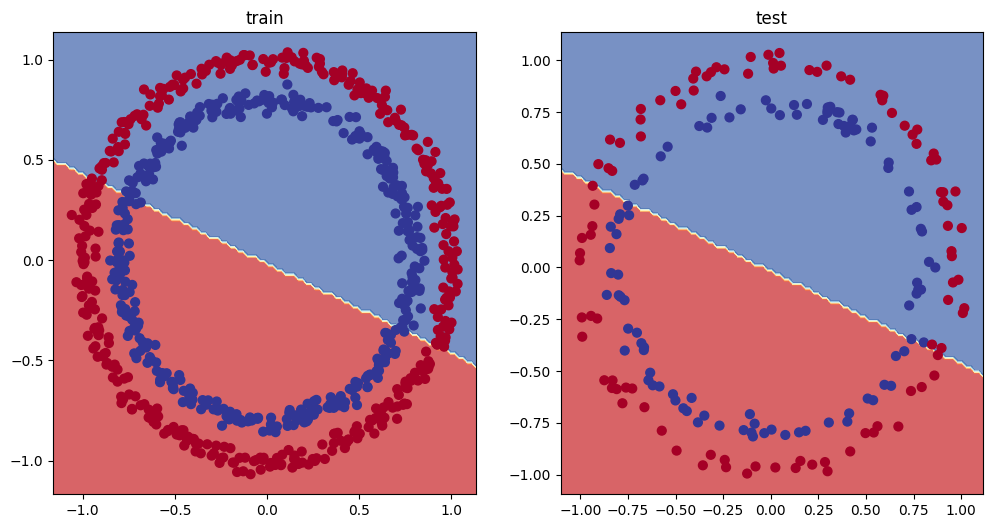

In [ ]:
# plot decision boundary of te model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, x_test, y_test)

our model does not do well because is only made of linear layers, there's no linear line in math that represents a circle, so the model can not guess correctly

# ways to improve a model (from a model perspective)

* add more layers - give the model more chances to learn patterns in data
* add more hidden units - go from 5 hidden units to 10 hidden units
* fit model for longer
* change the activation functions
* change the learning rate
* change the loss function

this options are "model perspective" because they deal directly with the model, instead of dealing with the data, this options are refered as **hyperparameters**

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3525,  0.3648],
                      [-0.0306, -0.0088],
                      [-0.1535, -0.0895],
                      [-0.0119, -0.0355],
                      [-0.6796,  0.2650]])),
             ('layer_1.bias',
              tensor([-0.6481, -0.6965,  0.3621,  0.0960,  0.6455])),
             ('layer_2.weight',
              tensor([[ 0.2099, -0.3967,  0.3774, -0.1103,  0.0090]])),
             ('layer_2.bias', tensor([-0.2711]))])

lets try to improve our model v0 -> v1 by:
* adding more hidden units
* add more layers
* increase num of epochs

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features= 2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
from torch.nn.modules.loss import BCEWithLogitsLoss
from sklearn.metrics import accuracy_score
# create a loss function
loss_fn = BCEWithLogitsLoss()

# create an optim
optim = torch.optim.Adam(params=model_2.parameters(),
                         lr=0.1)

# write a training and evaluation loop
epochs = 1000

for epoch in range(epochs):
  ### training
  model_2.train()

  # 1. forward pass
  y_logits = model_2(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss and accuracy
  train_loss = loss_fn(y_logits,
                      y_train)

  train_acc = accuracy_score(y_train.to('cpu').detach().numpy(), y_pred.to('cpu').detach().numpy())

  # 3. optimizer zero grad
  optim.zero_grad()

  # 4. loss backwards
  train_loss.backward()

  # 5. optimizer step
  optim.step()

  ### testing
  model_2.eval()
  with torch.inference_mode():

    # 1. forward pass
    test_logits = model_2(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate the loss and accuracy
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_score(y_test.to('cpu').detach().numpy(), test_pred.to('cpu').detach().numpy())

  # print out details
  if epoch % 100 == 0:
    print(f'epoch: {epoch}, train-acc: {train_acc}, train-loss {train_loss}, test-acc: {test_acc}, test-loss: {test_loss}')







epoch: 0, train-acc: 0.50875, train-loss 0.6939550638198853, test-acc: 0.5, test-loss: 0.7930287718772888
epoch: 100, train-acc: 0.515, train-loss 0.6929800510406494, test-acc: 0.455, test-loss: 0.694695770740509
epoch: 200, train-acc: 0.48625, train-loss 0.6931703090667725, test-acc: 0.465, test-loss: 0.695034921169281
epoch: 300, train-acc: 0.51125, train-loss 0.6929798722267151, test-acc: 0.46, test-loss: 0.694678783416748
epoch: 400, train-acc: 0.51, train-loss 0.6929798722267151, test-acc: 0.46, test-loss: 0.6946795582771301
epoch: 500, train-acc: 0.51, train-loss 0.6929798722267151, test-acc: 0.46, test-loss: 0.6946795582771301
epoch: 600, train-acc: 0.51, train-loss 0.6929798722267151, test-acc: 0.46, test-loss: 0.6946795582771301
epoch: 700, train-acc: 0.51, train-loss 0.6929798722267151, test-acc: 0.46, test-loss: 0.6946795582771301
epoch: 800, train-acc: 0.51, train-loss 0.6929798722267151, test-acc: 0.46, test-loss: 0.6946795582771301
epoch: 900, train-acc: 0.51, train-loss 

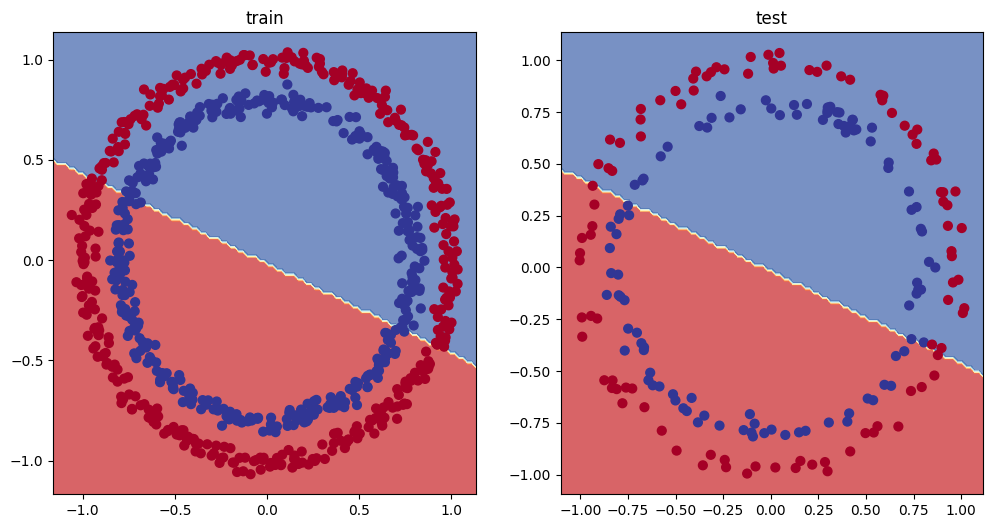

In [ ]:
# plot decision boundary of te model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_2, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_2, x_test, y_test)

### prepare a straight line data set to see if our model learns it

In [ ]:
# create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias # creates the image

print(len(x_regression))
x_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# create train and test split

train_split = int(0.8*len(x_regression))

x_train_reg, y_train_reg = x_regression[:train_split], y_regression[:train_split]
x_test_reg, y_test_reg = x_regression[train_split:], y_regression[train_split:]

print(f'x-train len: {len(x_train_reg)}, x-test len: {len(x_test_reg)}, y-train len: {len(y_train_reg)}, y-test len: {len(y_test_reg)}')

x-train len: 80, x-test len: 20, y-train len: 80, y-test len: 20


### adjusting the model of the regression data

In [ ]:
# same architecture of model_2 but with different num of in features

class ModelRegV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=1, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_reg_0 = ModelRegV0().to(device)



In [ ]:
# change the loss function and the optimizer too
loss_fn = nn.L1Loss()
optim = torch.optim.SGD(params=model_reg_0.parameters(), lr=0.01)

x_train_reg = x_train_reg.to(device)
x_test_reg = x_test_reg.to(device)
y_train_reg = y_train_reg.to(device)
y_test_reg = y_test_reg.to(device)





In [ ]:
epochs = 10000

for epoch in range(epochs):
  model_reg_0.train()
  # train
  y_pred = model_reg_0(x_train_reg)
  loss = loss_fn(y_pred, y_train_reg)
  optim.zero_grad()
  loss.backward()
  optim.step()

  # test
  model_reg_0.eval()
  with torch.inference_mode():
    test_pred = model_reg_0(x_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

  if epoch % 1000 == 0:
    print(f'train loss: {loss}, test-loss{test_loss}')


train loss: 0.13245971500873566, test-loss0.16803325712680817
train loss: 0.015374833717942238, test-loss0.004321623127907515
train loss: 0.014380780048668385, test-loss0.003257793141528964
train loss: 0.013472347520291805, test-loss0.0030975700356066227
train loss: 0.012450185604393482, test-loss0.00262528657913208
train loss: 0.011798596940934658, test-loss0.002452841494232416
train loss: 0.011394253931939602, test-loss0.0026913583278656006
train loss: 0.010794879868626595, test-loss0.0024845153093338013
train loss: 0.010667913593351841, test-loss0.002519908593967557
train loss: 0.010241994634270668, test-loss0.0023076683282852173


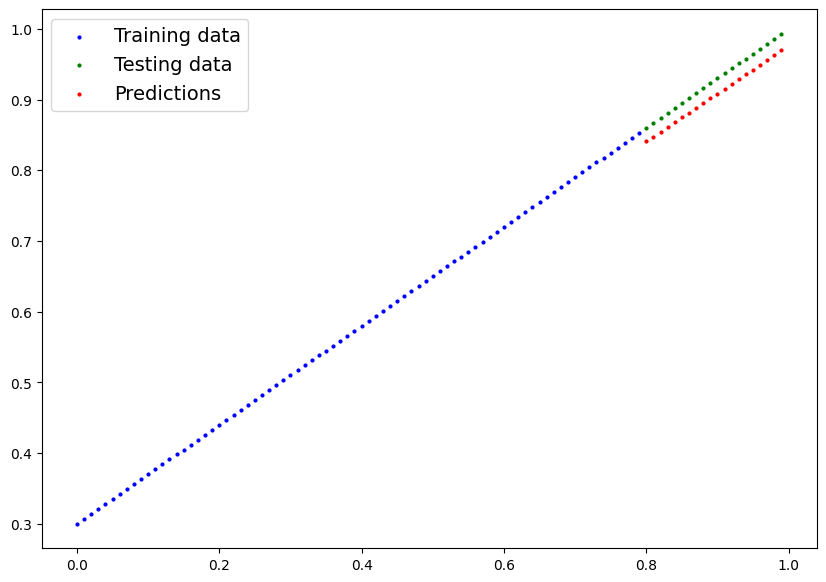

In [ ]:
model_reg_0.eval()

with torch.inference_mode():
  preds = model_reg_0(x_test_reg)

plot_predictions(x_train_reg.to('cpu'), y_train_reg.to('cpu'),
                 x_test_reg.to('cpu'), y_test_reg.to('cpu'), predictions=preds.to('cpu'))

## the missing piece: non-linearity

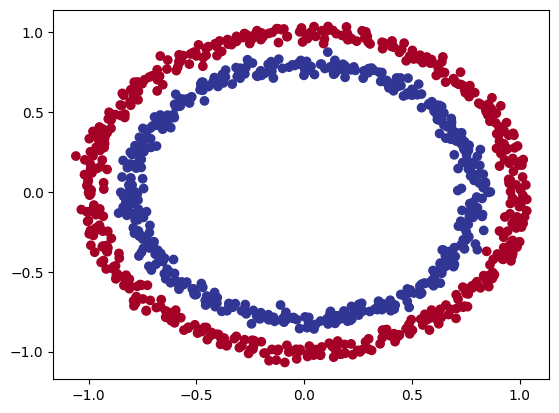

In [ ]:
# import circles again
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import torch

n_samples = 1000
x, y = make_circles(n_samples, noise=0.03,
                    random_state=42)

plt.scatter(x[:, 0], x[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# convert data to tensors
from sklearn.model_selection import train_test_split

x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train = torch.from_numpy(x_train).type(torch.float)
x_test = torch.from_numpy(x_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

data = [x_train, x_test, y_train, y_test]

for dataset in data:
  print(len(dataset), dataset.dtype)

800 torch.float32
200 torch.float32
800 torch.float32
200 torch.float32


## building a model with non-linearity

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
X_train, y_train = x_train.to(device), y_train.to(device)
X_test, y_test = x_test.to(device), y_test.to(device)


In [ ]:
x_train

tensor([[ 0.8760, -0.5337],
        [-0.2006,  0.7585],
        [-0.3008, -0.9750],
        ...,
        [ 0.2932,  0.9742],
        [ 0.7671, -0.1540],
        [ 0.0242, -0.9652]])

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
torch.manual_seed(42)
epochs = 10000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc}")

Epoch: 0 | Loss: 0.69433, Accuracy: 49.75% | Test Loss: 0.69240, Test Accuracy: 51.0
Epoch: 1000 | Loss: 0.36179, Accuracy: 99.62% | Test Loss: 0.35111, Test Accuracy: 100.0
Epoch: 2000 | Loss: 0.02112, Accuracy: 100.00% | Test Loss: 0.02064, Test Accuracy: 100.0
Epoch: 3000 | Loss: 0.00950, Accuracy: 100.00% | Test Loss: 0.01020, Test Accuracy: 100.0
Epoch: 4000 | Loss: 0.00622, Accuracy: 100.00% | Test Loss: 0.00724, Test Accuracy: 100.0
Epoch: 5000 | Loss: 0.00468, Accuracy: 100.00% | Test Loss: 0.00584, Test Accuracy: 100.0
Epoch: 6000 | Loss: 0.00379, Accuracy: 100.00% | Test Loss: 0.00502, Test Accuracy: 100.0
Epoch: 7000 | Loss: 0.00321, Accuracy: 100.00% | Test Loss: 0.00448, Test Accuracy: 100.0
Epoch: 8000 | Loss: 0.00279, Accuracy: 100.00% | Test Loss: 0.00410, Test Accuracy: 100.0
Epoch: 9000 | Loss: 0.00248, Accuracy: 100.00% | Test Loss: 0.00381, Test Accuracy: 100.0


## evaluate our model with its predictions

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test.to(device))))
y_preds[:5]

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.]], device='cuda:0')

In [ ]:
# convert data and preds to numpy()

y_test = y_test.detach().cpu().numpy()
y_preds = y_preds.detach().cpu().numpy()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

# mean absolute error
print(mean_absolute_error(y_test, y_preds))
print()
print(mean_squared_error(y_test, y_preds))
print()
print(classification_report(y_test, y_preds))

0.0

0.0

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        98
         1.0       1.00      1.00      1.00       102

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
y_test = torch.from_numpy(y_test)

In [ ]:
type(x_test)

torch.Tensor

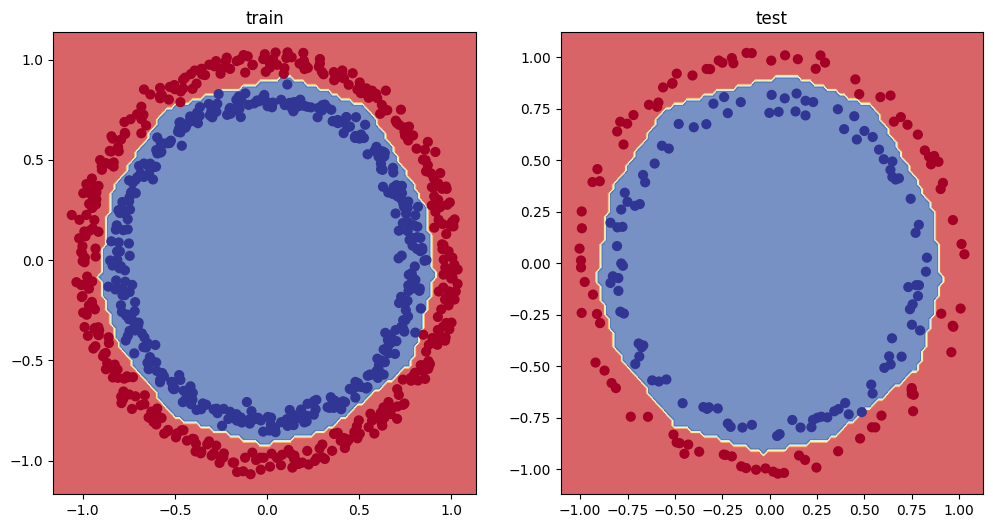

In [ ]:
# plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_3, x_test, y_test)

# multiclass classification

In [ ]:
# import cell
import torch
import torch.nn
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<class 'torch.Tensor'> <class 'torch.Tensor'>


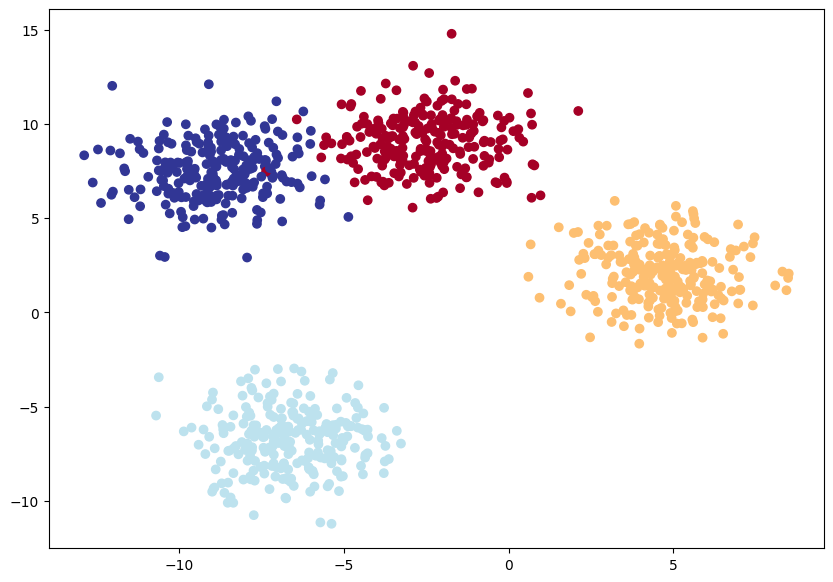

In [ ]:
# set the hyper parameters for data creations

num_classes = 4
num_features = 2
random_seed = 42

# create multiclass data
x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=num_features,
                            centers=num_classes,
                            cluster_std=1.5,
                            random_state=random_seed) # randomness

# turn data into tensors

x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

print(type(x_blob), type(y_blob))

x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob, test_size=0.2,
                                                                        random_state=random_seed)

# plot data
plt.figure(figsize=(10, 7))
plt.scatter(x_blob[:, 0], x_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### building the model

In [ ]:
# create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

In [ ]:
# building a multi-class classification model
class BlobModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

model_4 = BlobModelV0(input_features=2, # features
                      output_features=4, # num of classes
                      hidden_units=16).to(device) # num of neurons


In [ ]:
# create a loss function and an optimizer

loss_fn = nn.CrossEntropyLoss()

optim = torch.optim.Adam(params=model_4.parameters(), lr=0.01)

In [ ]:
# assing data to device
x_blob_train = x_blob_train.to(device)
x_blob_test = x_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

# do a first forward pass without training the model
model_4.eval()
with torch.inference_mode():
  untrained_preds = torch.softmax(model_4(x_blob_test), dim=1) # for binary we use sigmoid, for multiclass we use softmax
untrained_preds[:5]

tensor([[0.2073, 0.2387, 0.1798, 0.3743],
        [0.1932, 0.1961, 0.1827, 0.4280],
        [0.2276, 0.1993, 0.2557, 0.3174],
        [0.2223, 0.2330, 0.1808, 0.3639],
        [0.2135, 0.2276, 0.2063, 0.3526]], device='cuda:0')

In [ ]:
# get index of argmax from probs
torch.argmax(untrained_preds[0])

tensor(3, device='cuda:0')

In [ ]:
# convet prodiction probs to prediction labels
y_preds = torch.argmax(untrained_preds, dim=1)
y_preds[:10]

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0')

## create a training and testing loop

In [ ]:
# fit the model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_4.train()
  # do forward pass and get logits
  y_train_logits = model_4(x_blob_train)
  y_train_probs = torch.softmax(y_train_logits, dim=1)
  y_train_preds = torch.argmax(y_train_probs, dim=1)

  # calculate accuracy and loss
  y_train_preds_cpu = y_train_preds.detach().cpu().numpy()
  y_blob_train_cpu = y_blob_train.detach().cpu().numpy()
  train_acc = accuracy_score(y_blob_train_cpu, y_train_preds_cpu)

  train_loss = loss_fn(y_train_logits,
                       y_blob_train)
  # optim zero grad
  optim.zero_grad()

  # loss backwards
  train_loss.backward()

  # optim step
  optim.step()

  # testing
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(x_blob_test)
    y_test_probs = torch.softmax(y_test_logits, dim=1)
    y_test_preds = torch.argmax(y_test_probs, dim=1)

    y_blob_test_cpu = y_blob_test.detach().cpu().numpy()
    y_test_preds_cpu = y_test_preds.detach().cpu().numpy()
    test_acc = accuracy_score(y_blob_test_cpu,
                              y_test_preds_cpu)

    test_loss = loss_fn(y_test_logits, y_blob_test)

  # print out state of model
  if epoch % 100 == 0:
    print(f'epoch: {epoch}, train_loss: {train_loss}, train_acc: {train_acc}, test_loss: {test_loss}, test_acc: {test_acc}')

epoch: 0, train_loss: 1.310642123222351, train_acc: 0.24125, test_loss: 1.1843047142028809, test_acc: 0.285
epoch: 100, train_loss: 0.01774626225233078, train_acc: 0.99375, test_loss: 0.005550265312194824, test_acc: 1.0
epoch: 200, train_loss: 0.01585984043776989, train_acc: 0.9975, test_loss: 0.0039931959472596645, test_acc: 1.0
epoch: 300, train_loss: 0.014899738132953644, train_acc: 0.9975, test_loss: 0.0039129494689404964, test_acc: 1.0
epoch: 400, train_loss: 0.014623701572418213, train_acc: 0.9975, test_loss: 0.003531878814101219, test_acc: 1.0
epoch: 500, train_loss: 0.014585595577955246, train_acc: 0.995, test_loss: 0.005266672931611538, test_acc: 1.0
epoch: 600, train_loss: 0.014363455586135387, train_acc: 0.9975, test_loss: 0.004903297871351242, test_acc: 1.0
epoch: 700, train_loss: 0.014357767067849636, train_acc: 0.995, test_loss: 0.004790584556758404, test_acc: 1.0
epoch: 800, train_loss: 0.01418620627373457, train_acc: 0.995, test_loss: 0.0034230456221848726, test_acc: 1.

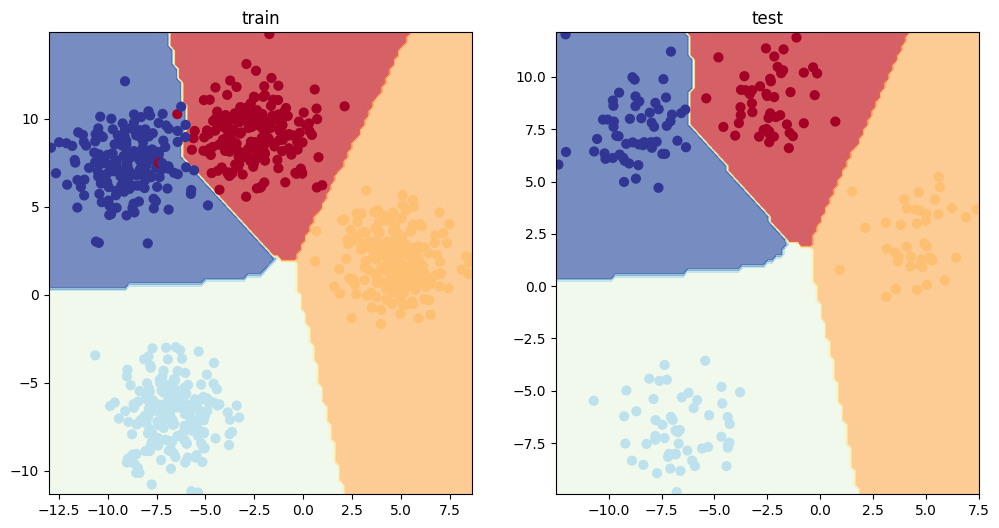

In [ ]:
# plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_4, x_blob_test, y_blob_test)